In [1]:
import os
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from dog_images import DogImages
from image_classifier import ImageClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
picsize = 128
# Step 1: Get List of Dogs
lst = [x[0] for x in os.walk('../Data/Images')]
lst_dogs = [a.replace("../Data/Images", '')[1:] for a in lst[1:]]
print(lst_dogs[0])

n02085620-Chihuahua


In [3]:
# Step 2: Make the Images...
dog_images = DogImages(lst_dogs, picsize)
dog_images.generate_img_files()
train_imgs = dog_images.load_images('train')
test_imgs = dog_images.load_images('test')
Xtest = test_imgs[0]
Ytest = test_imgs[1]
Xtrain = train_imgs[0]
Ytrain = train_imgs[1]
print(lst_dogs[-1])

n02116738-African_hunting_dog


In [4]:
# Step 3: Initial Shuffle of Train & Test Sets
Xhold = Xtrain
Yhold = Ytrain
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtrain[i, :] = Xhold[n, :]
    Ytrain[i, :] = Yhold[n, :]

Xhold = Xtest
Yhold = Ytest
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtest[i, :] = Xhold[n, :]
    Ytest[i, :] = Yhold[n, :]
print('done')

done


In [6]:
def shuffle_function(X, y):
    Xhold = X.copy()
    Yhold = y.copy()
    new = np.array([i for i in range(Xhold.shape[0])])
    np.random.shuffle(new)
    for i, n in enumerate(new):
        X[i, :] = Xhold[n, :]
        y[i, :] = Yhold[n, :]
    return X, y

In [7]:
def plot_learning(model):
    plt.plot(list(range(len(model.loss_function))),
             model.loss_function, color='y', label='Loss/Max Loss')
    plt.plot(list(range(len(model.train_accuracies))),
             model.train_accuracies, color='r', label='Training')
    plt.plot(list(range(len(model.val_accuracies))),
             model.val_accuracies, color='b', label='Validation')
    plt.ylabel('Probability')
    plt.xlabel('Epochs')
    plt.title('Accuracy & Loss')
    plt.ylim(ymax=1)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

In [8]:
N = 50

In [9]:
# need 0:1 to get 0... it's a weird numpy thing
# so for lst_dogs[N], go Yt...[:, N:N + 1] 
Ytrain_1 = np.zeros((Ytrain.shape[0],2))
Ytest_1 = np.zeros((Ytest.shape[0],2))

Ytrain_1[Ytrain[:,N]==1] = [1, 0]
Ytrain_1[Ytrain[:,N]==0] = [0, 1]

Ytest_1[Ytest[:,N]==1] = [1, 0]
Ytest_1[Ytest[:,N]==0] = [0, 1]

Ytrain_a = Ytrain_1[Ytrain_1[:,0] == 1]
Xtrain_a = Xtrain[Ytrain_1[:,0] == 1]
Ytrain_b = Ytrain_1[Ytrain_1[:,0] == 0][:3*Ytrain_a.shape[0]]
Xtrain_b = Xtrain_a #Xtrain[Ytrain_1[:,0] == 0][:3*Ytrain_a.shape[0]]

Ytrain_run = np.concatenate((Ytrain_a, Ytrain_b))
Xtrain_run = np.concatenate((Xtrain_a, Xtrain_b))

lst_dogs_1 = [lst_dogs[N][lst_dogs[N].index('-')+1:], 'Not Hot Dog']

Xtrain_run, Ytrain_run = shuffle_function(Xtrain_run, Ytrain_run)
print(lst_dogs_1)

['silky_terrier', 'Not Hot Dog']



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Percent Complete: 97.2222% - Train Accuracy: 51.020% - Validation Accuracy: 54.839% - Loss Function: 113.4045

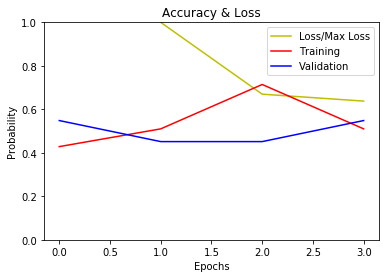

In [ ]:
model = ImageClassifier(picsize, lst_dogs_1,
                                 out_channels = 12,
                                 out_channels_2 = 24,
                                 hidden_units = 50,
                                 regularization_strength = 1.0,
                                 batch_size = 50,
                                 learning_rate = 0.0001,
                                 convolution_size = 5,
                                 pool_size = 2,
                                 training_epochs = 4,
                                 loss_threshold = 1.0,
                                 verbose=True)

model.fit(Xtrain_run, Ytrain_run)
plot_learning(model)
score = model.score(Xtest, Ytest_1)
print(score)